# Import libraries

In [1]:
import sqlite3
import pandas as pd
import sys
sys.path.append("..") 
from src.features.cleaning import cleaning
from datetime import datetime
from src.features.features import *
from src.features.cleaning import remove_outlier
from src.visualization.piePlot import piePlot
from src.visualization.distPlot import distPlot
from src.visualization.heatMap import heatMap
from src.visualization.boxPlot import boxPlot
from src.visualization.univariatePlot import *
pd.options.mode.chained_assignment = None 


Bad key "text.kerning_factor" on line 4 in
/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Connect to db

In [2]:
cnx = sqlite3.connect('../data/raw/people.db')
df = pd.read_sql_query("SELECT * FROM articles", cnx)

# Cleaning

In [3]:
df_clean = cleaning(df)

Total amount of articles... (37217, 19)
Dropping unnecesary columns... (37217, 16)
Dropping null values... (35186, 16)


In [4]:
df_clean.dtypes

Claps                      int64
Reading_Time               int64
Time              datetime64[ns]
Publication             category
Title                     object
Text                      object
Labels                    object
Date_Scrapping    datetime64[ns]
Images                     int64
Links                      int64
Code_Chunks                int64
Numbered_Lists             int64
Bullet_Lists               int64
Bolded                     int64
Italics                    int64
People                     int64
dtype: object

# Obtain features

In [5]:
df_features = featuresFromTimeCol(df_clean)
df_features = featuresFromPublicationCol(df_features)
df_features = featuresFromTitleCol(df_features)
df_features = featuresFromLabelsCol(df_features)

Total Labels:  29


In [6]:
df_features.head(3)

,Claps,Reading_Time,Publication,Title,Text,Images,Links,Code_Chunks,Numbered_Lists,Bullet_Lists,...,Label_Statistics,Label_Software Development,Label_Computer Vision,Label_Technology,Label_Web Development,Label_Data Science,Label_TensorFlow,Label_Cryptocurrency,Label_AI,Label_Reinforcement Learning
0,3100,5,Towards Data Science,Making Python Programs Blazingly Fast,"Python haters always say, that one of the reas...",1,5,0,0,2,...,0,0,0,0,1,1,0,0,0,0
1,1600,4,Towards Data Science,6 New Features in Python 3.8 for Python Newbies,Languages change. Languages adapt. Python 2 is...,3,2,2,0,3,...,0,0,0,1,0,0,0,0,0,0
2,1500,5,Towards Data Science,How to be fancy with Python,"Python is cool. Really cool. However, a lot of...",17,1,0,0,2,...,0,0,0,0,0,1,0,0,0,0


In [7]:
print(list(df_features.columns))

['Claps', 'Reading_Time', 'Publication', 'Title', 'Text', 'Images', 'Links', 'Code_Chunks', 'Numbered_Lists', 'Bullet_Lists', 'Bolded', 'Italics', 'People', 'Days_since_publication', 'Length_Title', 'Title_read_lvl', 'Sentiment_Title', 'Total_Labels', 'Label_Machine Learning', 'Label_Artificial Intelligence', 'Label_JavaScript', 'Label_React', 'Label_Docker', 'Label_Bitcoin', 'Label_Blockchain', 'Label_Programming', 'Label_AWS', 'Label_Data', 'Label_Neural Networks', 'Label_Data Visualization', 'Label_Big Data', 'Label_Swift', 'Label_Towards Data Science', 'Label_Python', 'Label_iOS', 'Label_Deep Learning', 'Label_NLP', 'Label_Statistics', 'Label_Software Development', 'Label_Computer Vision', 'Label_Technology', 'Label_Web Development', 'Label_Data Science', 'Label_TensorFlow', 'Label_Cryptocurrency', 'Label_AI', 'Label_Reinforcement Learning']


# Visualization

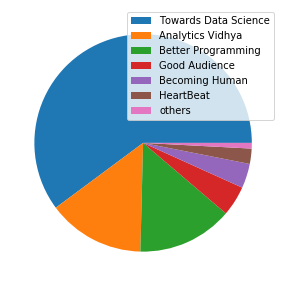

In [8]:
piePlot(data=df_features, col='Publication')

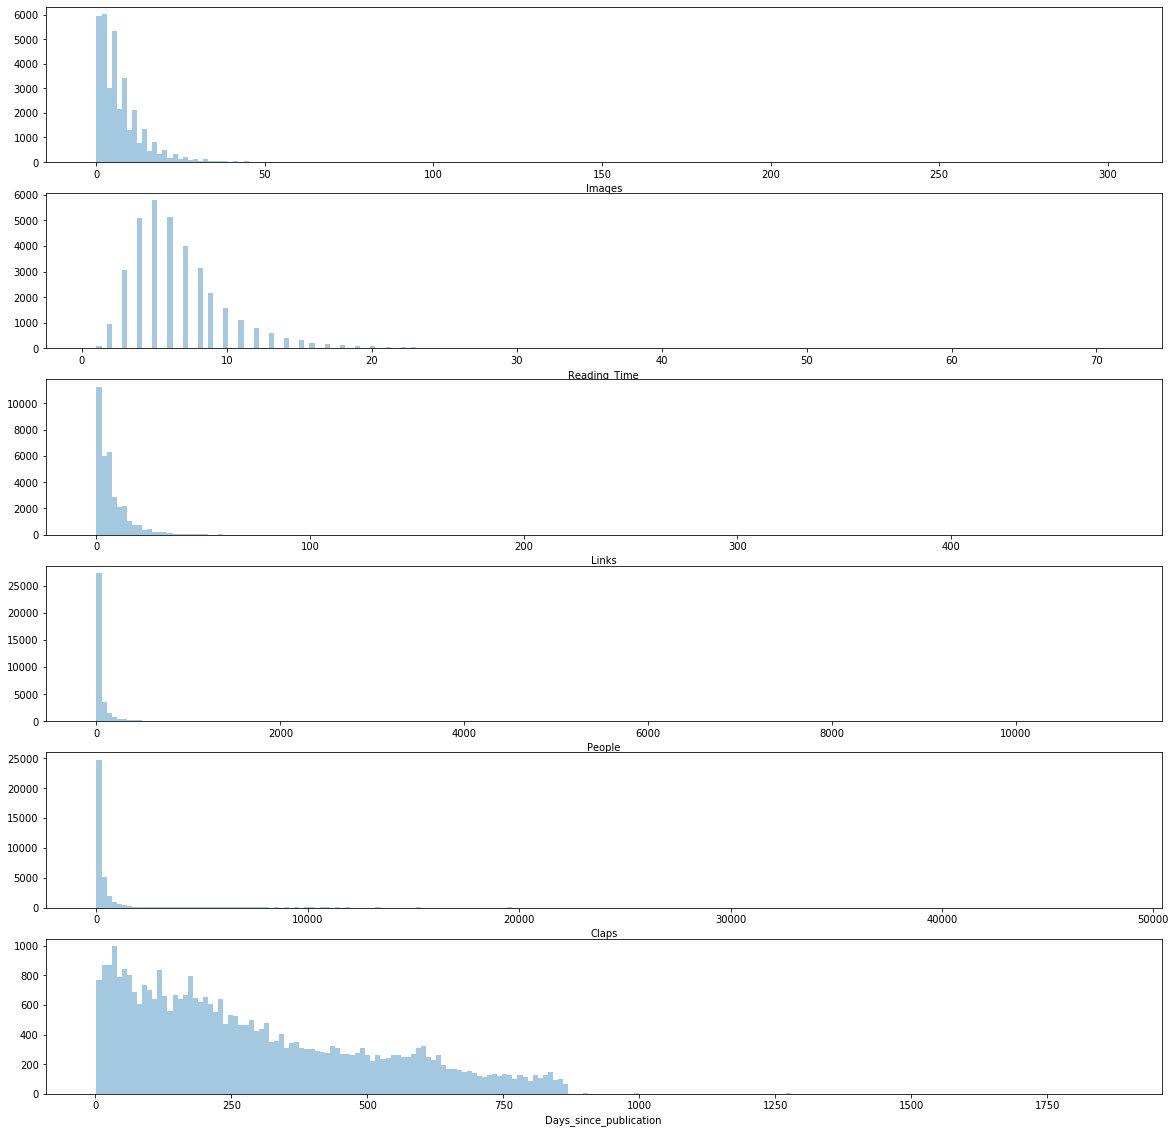

In [9]:
distPlot(data=df_features, cols=['Images', 'Reading_Time', 'Links','People', 'Claps','Days_since_publication'])

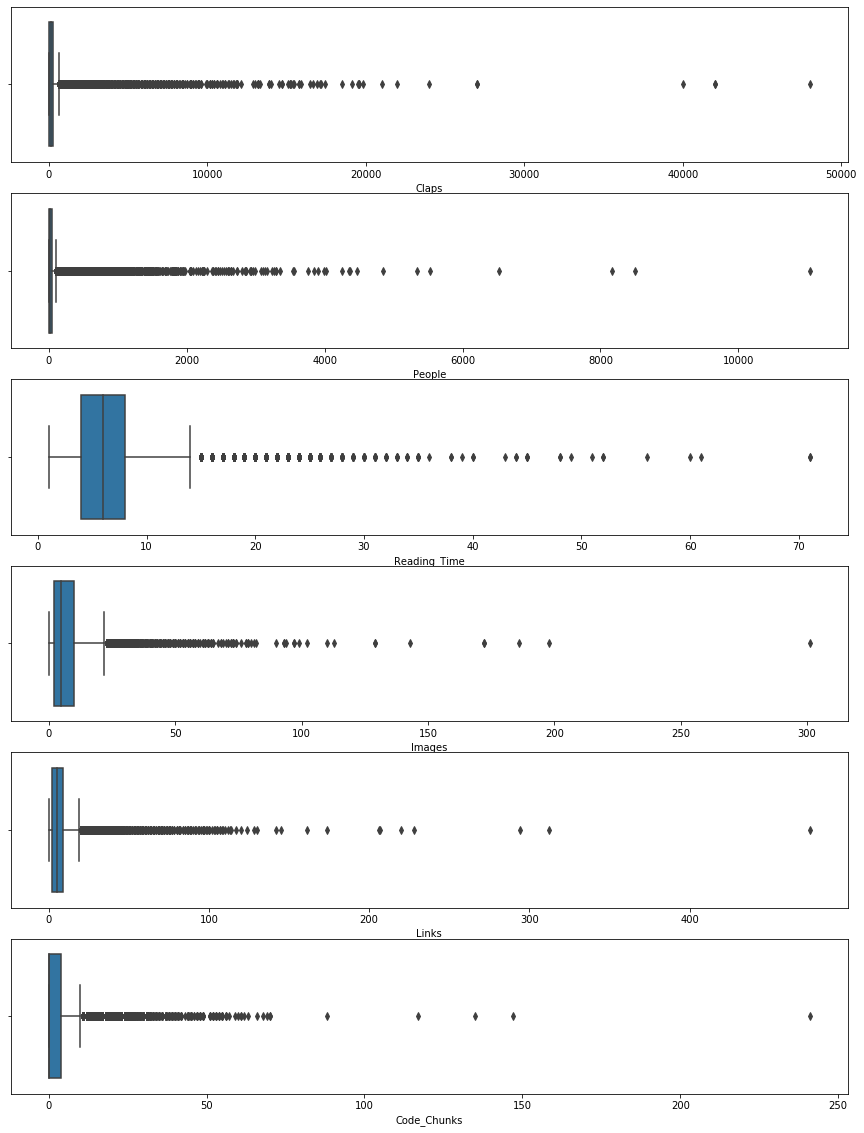

In [10]:
boxPlot(df_features,  cols=['Claps', 'People', 'Reading_Time', 'Images', 'Links', 'Code_Chunks'], figsize=[15,20])

In [11]:
df_features = remove_outlier(df_features, 'People')
#df_features = remove_outlier(df_features, 'Claps')
#df_features = remove_outlier(df_features, 'Title_read_lvl')
#df_features = remove_outlier(df_features, 'Reading_Time')

Number of outliers dropped:  4296


In [12]:
print(df_features.shape)
df_features.describe()

(30890, 47)


,Claps,Reading_Time,Images,Links,Code_Chunks,Numbered_Lists,Bullet_Lists,Bolded,Italics,People,...,Label_Statistics,Label_Software Development,Label_Computer Vision,Label_Technology,Label_Web Development,Label_Data Science,Label_TensorFlow,Label_Cryptocurrency,Label_AI,Label_Reinforcement Learning
count,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,...,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000,30890.000000
mean,152.076886,6.658595,7.279217,6.956685,2.970702,0.576983,3.377954,30.821237,32.864552,23.039592,...,0.042603,0.041373,0.026805,0.071026,0.019262,0.429751,0.023665,0.032502,0.085626,0.015053
std,203.021645,3.555408,7.745266,9.580741,6.005551,1.218384,3.025186,58.686587,72.551540,24.136536,...,0.201963,0.199154,0.161515,0.256873,0.137446,0.495048,0.152004,0.177333,0.279816,0.121767
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,6.000000,5.000000,4.000000,0.000000,0.000000,2.000000,11.000000,6.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,203.000000,8.000000,10.000000,9.000000,4.000000,1.000000,4.000000,36.000000,37.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4000.000000,71.000000,301.000000,475.000000,135.000000,37.000000,72.000000,2521.000000,2493.000000,109.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


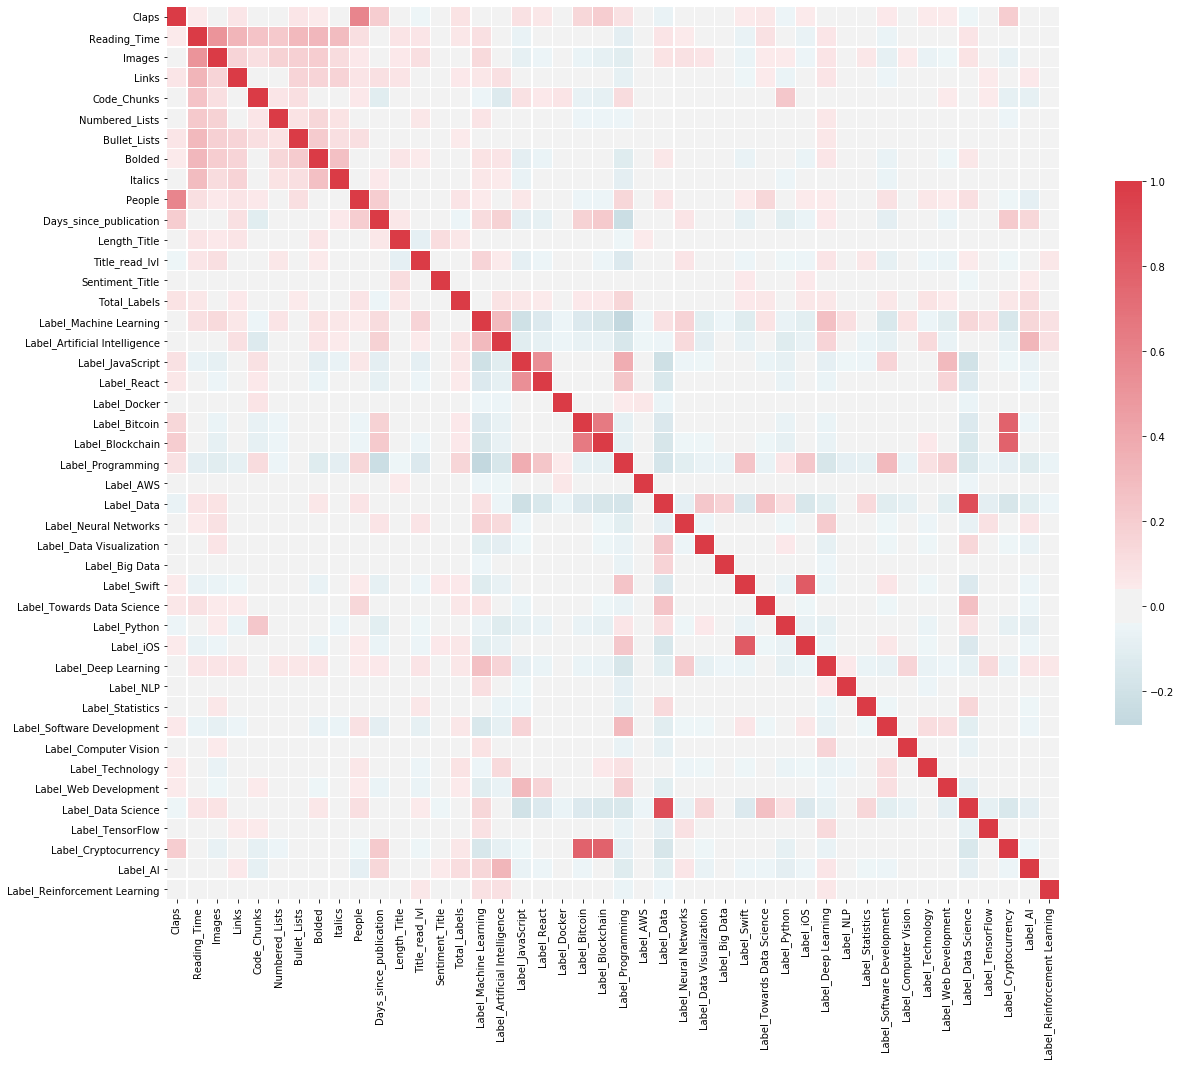

In [13]:
heatMap(data=df_features)

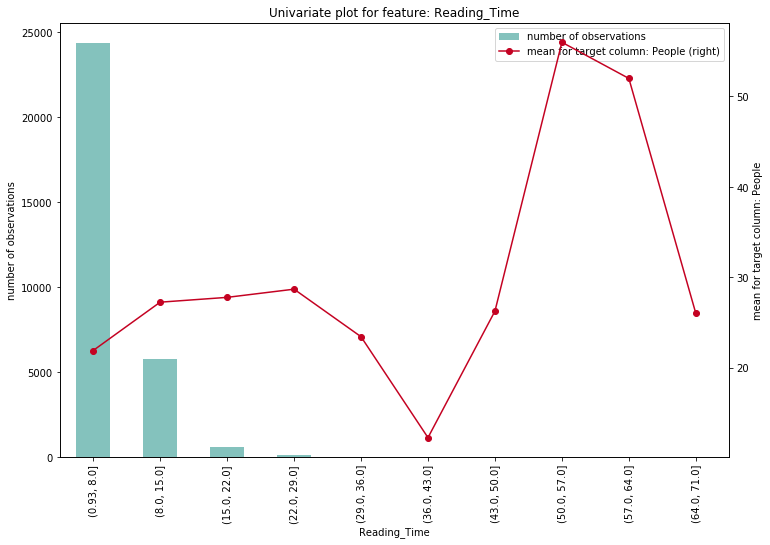

In [14]:
plot_univariate_numerical(data=df_features, bins=10, X='Reading_Time', y='People')

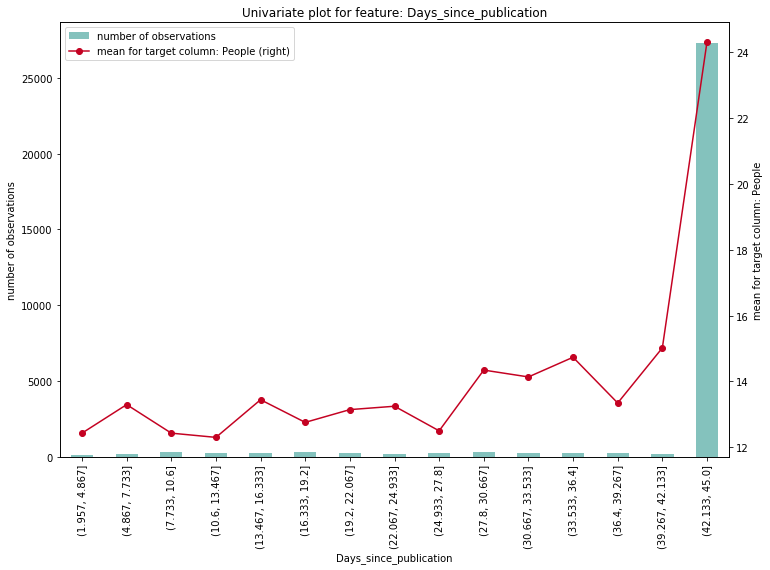

In [15]:
plot_univariate_numerical(df_features, X='Days_since_publication', y='People', bins=15, minimum=0, maximum=45)

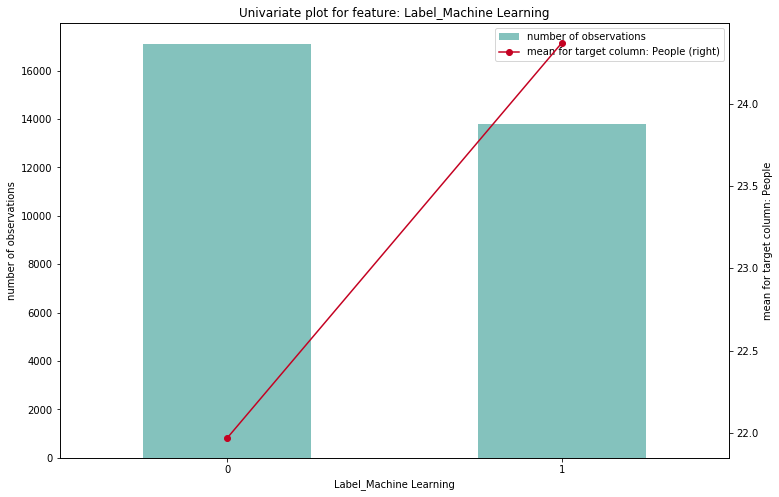

In [16]:
plot_univariate_ordinal(df_features, X='Label_Machine Learning', y='People')

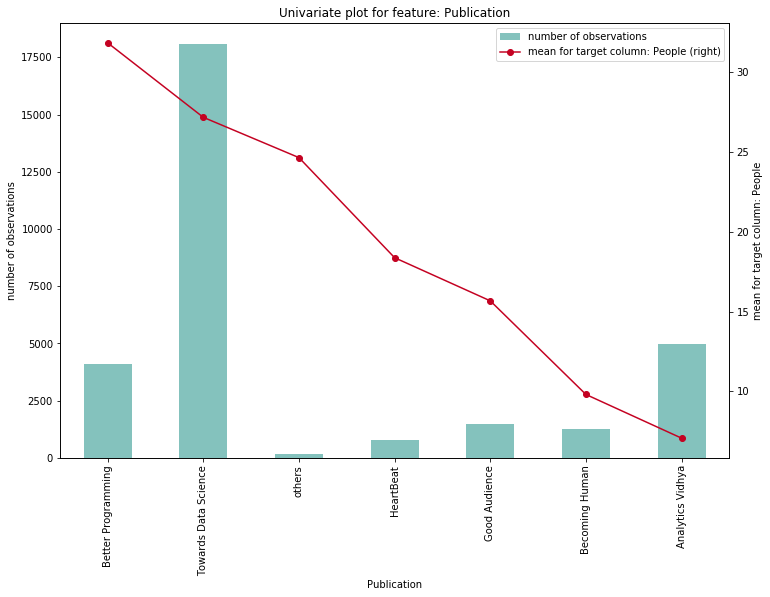

In [17]:
plot_univariate_categorical(df_features, X='Publication', y='People')

## Save Dataset

In [18]:
df_features.to_parquet("../data/processed/model_NoTextFeat.parquet", compression='gzip')